In [10]:
import numpy as np
import cv2

from matplotlib import pyplot as plt
img_url = r"F:\PYcode\Coding\ic\license\source_img\AAxwarped.jpg"
 
def getImageHorizontalAndVerticalSum(ImageThre):
    rows, cols = ImageThre.shape
    horsum = []
    versum = []
    for i in range(cols):
        val = np.array(ImageThre[:, i]).sum()
        horsum.append(val)
        # print(val)
    for i in range(rows):
        val = np.array(ImageThre[i, :]).sum()
        versum.append(val)
        # print(val)
    return horsum,versum
 
#这个函数我们最终需要找到一个区间表示字符的竖直分布情况
def getVerticalCharPosition(versum):
    result=[] #用来保存找到的结果：位置，区间大小
    i=0
    while i<len(versum):
        if(versum[i]!=0):
            j=1 #代表这个区间的大小
            sum=versum[i] #代表这整个区间的像素和是多少
            while(versum[i+j]!=0):
                sum=sum+versum[i+j]
                j=j+1
            if j > 10 and sum > 500: result.append([i, j])
            i=i+j+1 #跳过这整个不为0的区间，开始寻找下一个区间
        i=i+1
    return result
 
#这个函数我们最终需要找到四个区间表示字符的水平分布情况
def getHorizontalCharPosition(horsum):
    result = []  # 用来保存找到的结果：位置，区间大小
    i = 0
    while i < len(horsum):
        if(horsum[i] != 0):
            j = 1 #代表这个区间的大小
            sum1 = horsum[i] #代表这整个区间的像素和是多少
            while(horsum[i+j] != 0):
                sum1 = sum1 + horsum[i+j]
                j=j+1
                if j > 10 and sum1 > 500 :
                    result.append([i,j])
                i=i+j+1 #跳过这整个不为0的区间，开始寻找下一个区间
        i=i+1
    return result

 
#这个函数返回所有可能是字符的图片区域
def getCharImages(verticalCharPosition,horizontalCharPosition,image):
    charImages=[]
    #v,h:[position,width]
    for v in verticalCharPosition:
        for h in horizontalCharPosition:
            charImages.append(image[v[0]:v[0]+v[1],h[0]:h[0]+h[1]])
    return charImages




In [13]:
 
# load raw image to gray
RawImageGray=cv2.imread(img_url,0)
#scale gray image to a comment scale
# Image=cv2.resize(RawImageGray,(400,400))
#then get down to Image
#threshold
ret,ImageThre=cv2.threshold(RawImageGray,150,255,cv2.THRESH_BINARY_INV)

horsum,versum = getImageHorizontalAndVerticalSum(ImageThre)

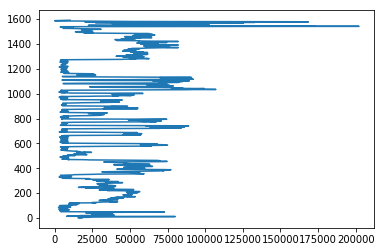

In [14]:
 
#输出函数曲线图，这里输出了水平方向和竖直方向上的像素情况，可以很明显的知道数字的分布
rows, cols = ImageThre.shape
# X=np.arange(0,cols,1)
# plt.plot(X,horsum)
X=np.arange(0,rows,1)
plt.plot(versum,X)
plt.show()

In [29]:
 
#开始求出水平和竖直两个方向上的字符的方位
#遍历求和数组，找到连续的不为0的一个区间，这个区间就很可能是字符区间，但是总是会有噪声的，去除噪声可以根据区间大小和区间整体像素和来筛选
#遍历竖直区间
verticalCharPosition=getVerticalCharPosition(versum)
horizontalCharPosition=getHorizontalCharPosition(horsum)
#从这里我们得到了区间，可以开始切字符了
charImages = getCharImages(verticalCharPosition, horizontalCharPosition, RawImageGray)

#显示所有字符
for i in range(len(charImages)):
    cv2.imshow(str(i),charImages[i])
cv2.imshow('raw image',ImageThre)
cv2.waitKey(0)
cv2.destroyAllWindows()

IndexError: list index out of range

In [35]:
v = np.array(versum)

In [36]:
v.mean()

33047.00690954774